In [0]:
# Building a large word2vec model with Gensim, for later use in a LSTM, CRF model
# Also might try to use it in other types of models like an attention model
from gensim.models import Word2Vec
from gensim.utils import simple_tokenize
from google.colab import drive
import os
import random
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
awca = os.listdir('/content/drive/My Drive/Berkeley DH/AWCA/TXTs/Secondary Sources')
txts = []
for file in awca:
  if file.endswith('.txt'):
    txts.append(open('/content/drive/My Drive/Berkeley DH/AWCA/TXTs/Secondary Sources/' + file, 'r').read())
      
print(len(txts))

1346


In [0]:
from gensim.utils import simple_preprocess

def doc_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True, min_len=1))

In [0]:
words = list(doc_to_words(txts))

In [0]:
w2v = Word2Vec(words, min_count=1)

In [0]:
len(w2v.wv.vocab)

884426

In [0]:
w2v.most_similar('a')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('i', 0.7394552230834961),
 ('f', 0.6378604769706726),
 ('id', 0.6358108520507812),
 ('u', 0.6338558197021484),
 ('b', 0.6174332499504089),
 ('of', 0.6114984750747681),
 ('s', 0.6055311560630798),
 ('bar', 0.5949001312255859),
 ('ak', 0.587770938873291),
 ('e', 0.5857042670249939)]

In [0]:
w2v.most_similar('history')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('civilization', 0.8396412134170532),
 ('historical', 0.8280161619186401),
 ('science', 0.8156287670135498),
 ('wittfogel', 0.8107545375823975),
 ('origins', 0.8093318343162537),
 ('religion', 0.8037346601486206),
 ('theory', 0.8030173778533936),
 ('historiography', 0.7978354692459106),
 ('literature', 0.7936256527900696),
 ('world', 0.7932981252670288)]

In [0]:
w2v.most_similar('geschichte')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('untersuchungen', 0.9163354635238647),
 ('wien', 0.9161162376403809),
 ('alten', 0.9124737977981567),
 ('mesopotamien', 0.9096227884292603),
 ('kunst', 0.9093112945556641),
 ('archdologie', 0.9084532856941223),
 ('lexikon', 0.9080384969711304),
 ('hethitischen', 0.9079078435897827),
 ('darmstadt', 0.9057190418243408),
 ('welt', 0.9047058820724487)]

In [0]:
w2v.save('/content/drive/My Drive/Berkeley DH/AWCA/Collab_notebooks/fullword2vecmincount1.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model = Word2Vec.load("/content/drive/My Drive/Berkeley DH/AWCA/Collab_notebooks/fullword2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model.most_similar('veenhof')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dercksen', 0.880573034286499),
 ('larsen', 0.8629011511802673),
 ('oacc', 0.7739497423171997),
 ('donbaz', 0.7632951736450195),
 ('hecker', 0.7311949729919434),
 ('kryszat', 0.7221112251281738),
 ('garelli', 0.7153624892234802),
 ('michel', 0.699799120426178),
 ('balkan', 0.6790772676467896),
 ('yenetimi', 0.6729897856712341)]

In [0]:
model.most_similar('landsberger')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kraus', 0.7886695861816406),
 ('giiterbock', 0.764764130115509),
 ('forrer', 0.7578856945037842),
 ('lewy', 0.7471722364425659),
 ('ungnad', 0.742644190788269),
 ('balkan', 0.7424110174179077),
 ('koschaker', 0.7264268398284912),
 ('poebel', 0.7229613065719604),
 ('hirsch', 0.6982314586639404),
 ('oppenheim', 0.6917952299118042)]

In [0]:
model.most_similar('abb')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('taf', 0.7065073251724243),
 ('nr', 0.666862964630127),
 ('tf', 0.6646314859390259),
 ('siegel', 0.661652684211731),
 ('chetiter', 0.6387606859207153),
 ('umzeichnung', 0.6384928226470947),
 ('xxvii', 0.6343944072723389),
 ('band', 0.6341820955276489),
 ('bm', 0.633516252040863),
 ('marv', 0.629673957824707)]

In [0]:
model.most_similar('istar')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('tar', 0.8460395336151123),
 ('belum', 0.8322064280509949),
 ('suen', 0.7890267372131348),
 ('abum', 0.7825851440429688),
 ('hubur', 0.7690476179122925),
 ('ili', 0.767443060874939),
 ('alahum', 0.7595820426940918),
 ('laban', 0.748563289642334),
 ('aggur', 0.7438355088233948),
 ('agsur', 0.7432774305343628)]

In [0]:
model.most_similar('temple')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('palace', 0.7568727135658264),
 ('eanna', 0.7522234916687012),
 ('cult', 0.7501311898231506),
 ('sanctuary', 0.7359373569488525),
 ('temples', 0.7293845415115356),
 ('royal', 0.7171753644943237),
 ('treasury', 0.6989771127700806),
 ('precinct', 0.6984622478485107),
 ('governor', 0.6639423966407776),
 ('shrine', 0.6605522036552429)]

In [0]:
len(model.wv.vocab)

134263

In [0]:
model.most_similar('kanesh')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kanish', 0.8662407398223877),
 ('kanes', 0.8548687100410461),
 ('kanis', 0.8367563486099243),
 ('kani', 0.8036369681358337),
 ('kane', 0.7965807914733887),
 ('colony', 0.7682368755340576),
 ('kiirum', 0.7523856163024902),
 ('amkuwa', 0.7286161780357361),
 ('kaneg', 0.7251302599906921),
 ('kdrum', 0.717052698135376)]

In [0]:
model.similarity('temple', 'ishtar')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.611998

In [0]:
from sklearn.decomposition import PCA

In [0]:
words = []
vectors = []
for elem in model.wv.vocab:
  words.append(elem)
  vectors.append(model[elem])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [0]:
print(words[0:10])
print(vectors[0:10])

['aula', 'orientalis', 'issn', 'recensiones', 'harry', 'hoffner', 'jr', 'craig', 'melchert', 'grammar']
[array([-1.2824947 ,  0.10630114,  0.5895561 ,  0.18818268,  0.34205   ,
        0.0218786 , -0.39656606, -0.88327837, -0.04186372,  0.3536743 ,
       -0.23233694, -0.2811517 ,  0.0259926 ,  0.41969615,  0.2227518 ,
        0.31366777, -0.74524987,  0.471668  ,  0.15198739,  0.90889585,
       -0.55077785, -0.256285  , -0.22942027,  0.421746  , -0.76475924,
       -0.43233898, -0.7455095 , -0.11696601,  0.07270794, -1.0193254 ,
       -0.4686109 , -0.72416705,  0.12055095, -0.20626695, -0.01657597,
        0.24407375,  0.00978949,  0.0269772 , -0.45430213, -0.63531   ,
        0.37172043,  0.5421892 , -0.08903253,  0.5786251 ,  0.38488576,
        0.10731885,  0.38706526, -0.00197251,  0.28498733, -0.4734481 ,
        0.36782122, -0.3916532 ,  0.18030886,  0.7218816 ,  0.4636435 ,
       -0.25331825,  0.03485372,  0.6662786 , -0.2016091 , -0.48338255,
        0.3502724 , -0.19825652

In [0]:
import numpy as np
import matplotlib.pyplot as plt
vectors = np.array(vectors)

In [0]:
pca = PCA(n_components=2)

In [0]:
two_best = pca.fit(vectors).transform(vectors)

In [0]:
sample_words = []
sample_best = []
for i in range(len(words)):
  if random.uniform(0, 1) > 0.999:
    sample_words.append(words[i])
    sample_best.append(two_best[i])


In [0]:
sample_best = np.array(sample_best)

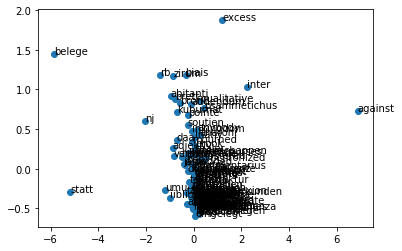

<Figure size 1440x720 with 0 Axes>

In [0]:
fig, ax = plt.subplots()
ax.scatter(sample_best[:, 0], sample_best[:, 1])
fig.figsize = (10, 10)

for i, txt in enumerate(sample_words):
    ax.annotate(txt, (sample_best[i, 0], sample_best[i, 1]))
plt.figure(figsize=(20,10))
plt.show()